In [350]:
%%HTML
<link rel="stylesheet" type="text/css" href="stile.css">

# Evoluzione della Telefonia
## Analisi delle vendite e delle tendenze di mercato
 Alice Blandino, 163002  
 Progetto di data-science

# Perchè questo progetto?
Gli smartphone sono dispositivi fondamentali.  
Vogliamo capire quali modelli dominano il mercato e perché.  
L’analisi dei dati ci aiuterà a scoprire quali fattori influenzano le vendite.  

## Domande chiave
1. Come si sono evolute le vendite di smartphone nel tempo?
2. Qual è il telefono più venduto di sempre? E per gli smartphone?
3. Qual è la relazione tra il produttore (marca) e il numero di unità vendute?
4. C'è una correlazione tra l'introduzione degli smartphone e l'abbandono dei non-smartphone?
5. Quali marche dominano il mercato degli smartphone e quale tipo di telefono producono?

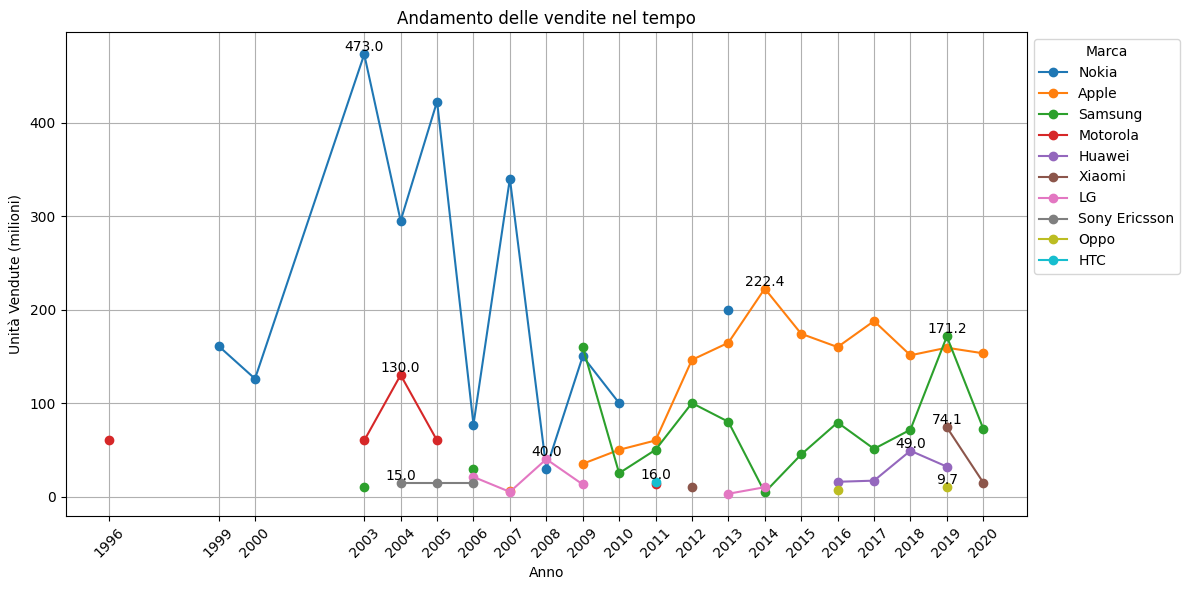

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Caricare il dataset
df = pd.read_csv("dataset1.csv")

# Pulizia e selezione dei dati
# df = df[df["Smartphone?"] == True]  # Filtra solo gli smartphone
df = df[df["Year"] <= 2020]  # Filtra solo gli anni fino al 2020
df_grouped = df.groupby(["Year", "Manufacturer"])["Units Sold (million )"].sum().unstack()

# Selezionare solo le prime 10 marche più vendute
top_manufacturers = df_grouped.sum(axis=0).nlargest(10).index  # Calcola le prime 10 marche per vendite totali
df_grouped = df_grouped[top_manufacturers]  # Filtra per queste marche

# Creazione del grafico
ax = df_grouped.plot(kind="line", marker="o", figsize=(12, 6))

for manufacturer in df_grouped.columns:
    #troviamo l'indice del punto massimo
    max_value_idx = df_grouped[manufacturer].idxmax()
    max_value = df_grouped[manufacturer].max()
    ax.text(max_value_idx, max_value, f'{max_value:.1f}', color='black', ha='center', va='bottom')#per aggiungere sopra il valore

#plot
plt.title("Andamento delle vendite nel tempo")
plt.xlabel("Anno")
plt.ylabel("Unità Vendute (milioni)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Marca")#per mettere la legenda fuori dal grafico
plt.grid(True)
ax.set_xticks(df_grouped.index)#per includere tutti gli anni del dataset
plt.xticks(rotation=45)#ruotare etichette
plt.tight_layout()
plt.show()


# Dataset utilizzato
Il dataset principale contiene informazioni sui telefoni, con le seguenti colonne:
- Marca (Apple, Samsung, Xiaomi…);
- Modello;
- Form-factor;
- Anno di uscita; 
- Unità vendute.

In [3]:
import pandas as pd
df1=pd.read_csv("dataset1.csv")
df1.head(10)
#df1_sorted = df1.sort_values(by="Year", ascending=False)
#df1_sorted.head(10)

,Rank,Manufacturer,Model,Form Factor,Smartphone?,Year,Units Sold (million )
0,1,Nokia,1100,Bar,False,2003,250.0
1,2,Nokia,1110,Bar,False,2005,247.5
2,3,Apple,iPhone 6 & 6 Plus,Touchscreen,True,2014,222.4
3,4,Nokia,105 Series,Bar,False,2013,200.0
4,5,Apple,iPhone 6S & 6S Plus,Touchscreen,True,2015,174.1
5,6,Apple,iPhone 5S,Touchscreen,True,2013,164.5
6,7,Nokia,3210,Bar,False,1999,161.0
7,8,Apple,iPhone 7 & 7 Plus,Touchscreen,True,2016,159.9
8,9,Apple,"iPhone11, 11Pro & 11Pro Max",Touchscreen,True,2019,159.2
9,10,Apple,"iPhone XR, iPhone XS & iPhone XS Max",Touchscreen,True,2018,151.1


Fonte: <a href="http://kaggle.com/datasets/muhammadroshaanriaz/global-best-selling-phone-sales?select=top+120+best-selling+mobile+phones.csv">kaggle</a>  
Autore: Muhammad Roshan Riaz  
Ultimo update: 1 anno fa

### Il from factor
I telefoni presi in questione nel dataset sono:
<div style="display: flex; justify-content: space-evenly; align-items: center; text-align: center;">
    <div style="border: 2px solid transparent; padding: 10px; width: 350px; height: auto; box-sizing: border-box;">
        <p><b>Bar</b>: telefono a barra.</p>
        <img src="./foto/Nokia.jpeg" width="200px" height="200px">
    </div>
    <div style="border: 2px solid transparent; padding: 10px; width: 350px; height: auto; box-sizing: border-box;">
        <p><b>Keyboard bar</b>: telefono a barra con tastiera.</p>
        <img src="./foto/Motorola.jpg" width="200px" height="200px">
    </div>
    <div style="border: 2px solid transparent; padding: 10px; width: 350px; height: auto; box-sizing: border-box;">
        <p><b>Slider</b>: telefono con più parti.</p>
        <img src="./foto/Slider.jpg" width="200px" height="200px">  
    </div>
</div>

<div style="display: flex; justify-content: space-evenly; align-items: center; text-align: center;">
    <div style="border: 2px solid transparent; padding: 10px; width: 350px; height: auto; box-sizing: border-box;">
        <p><b>Taco</b>: chiamato così per la sua forma.</p>
        <img src="./foto/Taco.jpg" width="200px" height="200px">
    </div>
    <div style="border: 2px solid transparent; padding: 10px; width: 350px; height: auto; box-sizing: border-box;">
        <p><b>flip-phone</b>: telefono pieghevole.</p>
        <img src="./foto/flip.jpg" width="200px" height="200px">     
    </div>
    <div style="border: 2px solid transparent; padding: 10px; width: 350px; height: auto; box-sizing: border-box;">
        <p><b>Smartphones</b>: telefono con prestazioni elevate.</p>
        <img src="./foto/smartphone.jpg" width="200px" height="200px"> 
    </div>
</div>


# Evoluzione delle vendite nel tempo
## Negli anni recenti, quali telefoni hanno venduto di più?

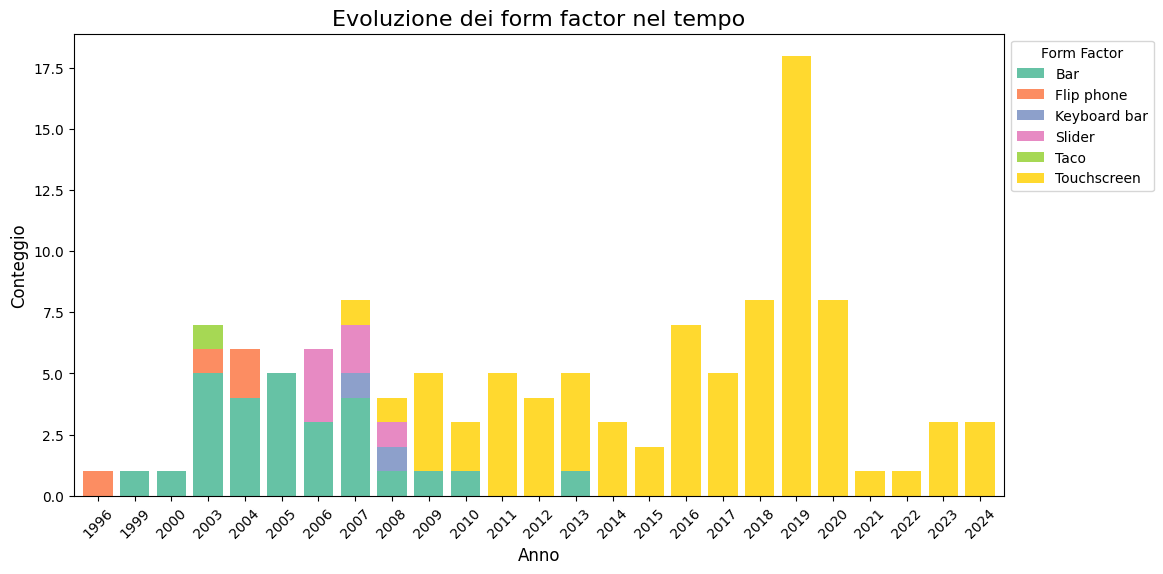

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#codice per una tabella pivot con le frequenze per ogni 'Year' e 'Form Factor'
pivot_df = df1.pivot_table(index='Year', columns='Form Factor', aggfunc='size', fill_value=0)
pivot_df.plot(kind='bar', stacked=True, color=sns.color_palette("Set2"), width=0.8, figsize=(12, 6))
plt.title("Evoluzione dei form factor nel tempo", fontsize=16) #titolo
plt.xlabel("Anno", fontsize=12) #asse x
plt.ylabel("Conteggio", fontsize=12) #asse y
plt.xticks(rotation=45) #rotazione
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Form Factor")#leggenda fuori dal grafico
plt.show()

# Smartphone vs Feature Phone
## Non solo smartphones, ma chi ha venduto di più?

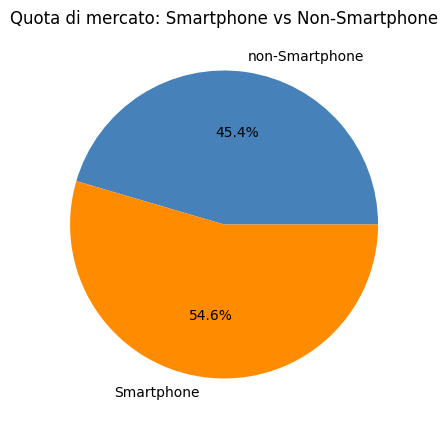

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

#grafico a torta per tipo di teledono
df1_smartphone = df1.groupby('Smartphone?')['Units Sold (million )'].sum()
fig, ax = plt.subplots(figsize=(5, 5))
df1_smartphone.plot(kind='pie', autopct='%1.1f%%', title="Quota di mercato: Smartphone vs Non-Smartphone", 
                    labels=["non-Smartphone", "Smartphone"], 
                    colors=["#4682B9", "#FF8C00"], 
                    ax=ax)
plt.ylabel('')#per rimuovere etichetta sull'asse y
plt.show()


Hanno venduto di più gli **Smartphone**.

## E per quanto riguarda i non-Smartphone?

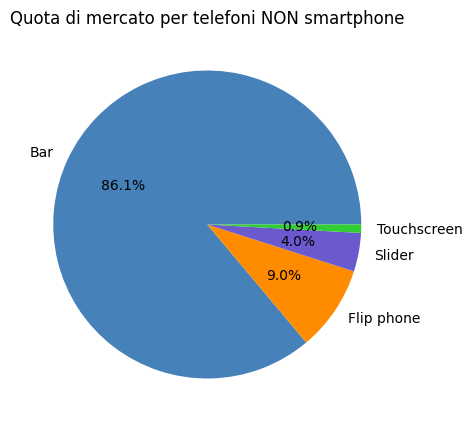

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

#grafico a torta per tipo di smartphonr
df_non_smartphones = df1[df1["Smartphone?"] == False]#per escludere i non smartphone
df_non_smartphones_grouped = df_non_smartphones.groupby('Form Factor')['Units Sold (million )'].sum()
fig, ax = plt.subplots(figsize=(5, 5))
df_non_smartphones_grouped.plot(kind='pie', autopct='%1.1f%%', title="Quota di mercato per telefoni NON smartphone", 
                                labels=df_non_smartphones_grouped.index, 
                                colors=["#4682B9", "#FF8C00", "#6A5ACD", "#32CD32", "#FF6347"], 
                                ax=ax)
plt.ylabel('') 
plt.show()


## Classifica separata per Feature Phone e Smartphone
Quali sono i telefoni più venduti per categoria?
Abbiamo diviso la classifica in **Feature Phone** e **Smartphone**:

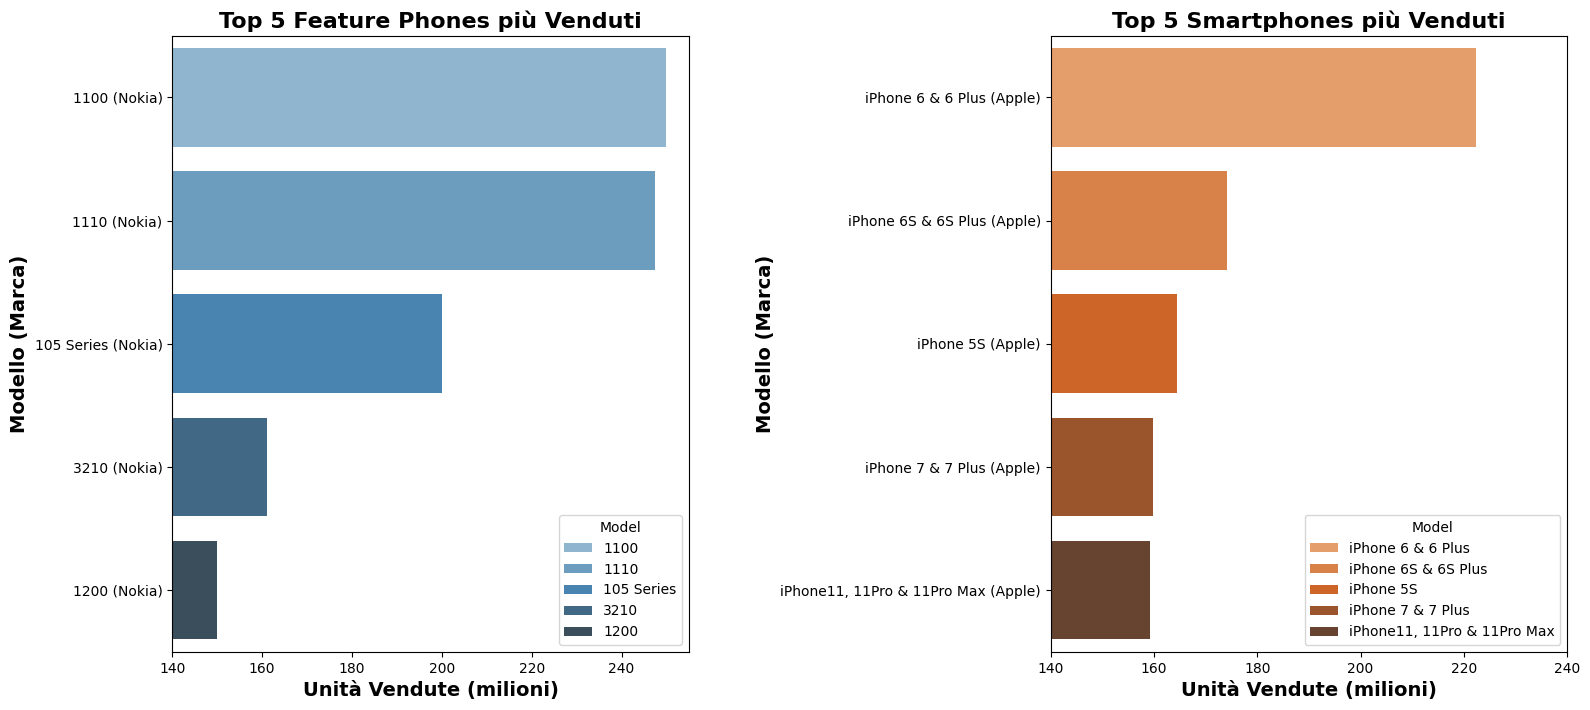

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#grafici classifica dei più venduti suddivisi per tipo
#dividere tra future-phones e smartphones
feature_phones = df1[df1["Smartphone?"] == False].sort_values(by="Units Sold (million )", ascending=False).head(5)
smartphones = df1[df1["Smartphone?"] == True].sort_values(by="Units Sold (million )", ascending=False).head(5)
plt.figure(figsize=(18, 8))#necessario per visualizzare i grafici senza sovrapposizioni

#1-grafico Feature Phones
plt.subplot(1, 2, 1)
sns.barplot(x=feature_phones["Units Sold (million )"], y=feature_phones["Model"] + " (" + feature_phones["Manufacturer"] + ")",
            palette="Blues_d", hue=feature_phones["Model"]) 
plt.xlabel("Unità Vendute (milioni)", fontsize=14, fontweight='bold')
plt.ylabel("Modello (Marca)", fontsize=14, fontweight='bold')
plt.title("Top 5 Feature Phones più Venduti", fontsize=16, fontweight='bold')
plt.xlim(140, 255)

#2-grafico Smartphones
plt.subplot(1, 2, 2)
sns.barplot(x=smartphones["Units Sold (million )"], y=smartphones["Model"] + " (" + smartphones["Manufacturer"] + ")",
            palette="Oranges_d", hue=smartphones["Model"])
plt.xlabel("Unità Vendute (milioni)", fontsize=14, fontweight='bold')
plt.ylabel("Modello (Marca)", fontsize=14, fontweight='bold')
plt.title("Top 5 Smartphones più Venduti", fontsize=16, fontweight='bold')
plt.xlim(140, 240)
plt.subplots_adjust(wspace=0.7)#per aggiungere spazio tra i grafici
plt.show()


Il **feature Phones** più venduto è il **Nokia 1100(2003)**.  
Lo **smartphone** più venduto è **iPhone6 & 6 Plus (Apple)**.  

# I brand con i telefoni più venduti
## Quale azienda ha dominato il mercato?

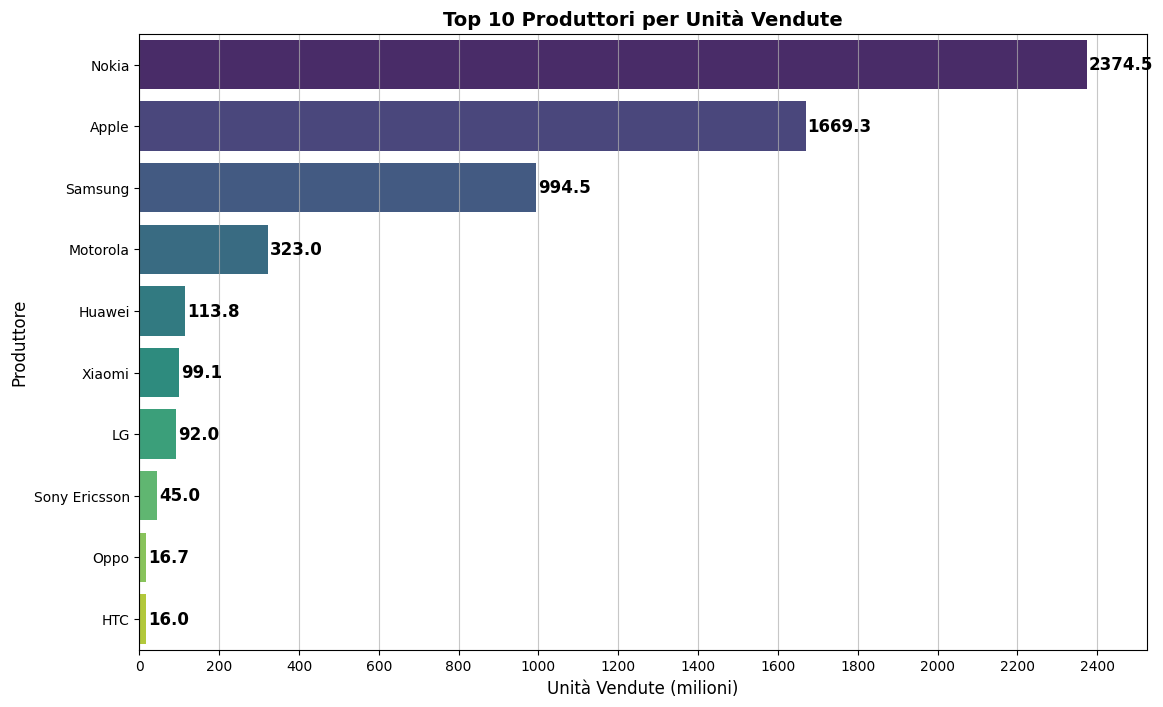

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df1 = pd.read_csv("dataset1.csv")

#grafico crescente per top 10 unità vendute
df1_grouped = df1.groupby('Manufacturer')['Units Sold (million )'].sum().sort_values(ascending=False)
top_n = 10
df1_grouped = df1_grouped.head(top_n)#prendiamo solo le prime 10
plt.figure(figsize=(13, 8))

sns.barplot(
    x=df1_grouped.values, 
    y=df1_grouped.index, 
    hue=df1_grouped.index,
    palette="viridis",
    legend=False)


for i, value in enumerate(df1_grouped.values): #per mettere i valori vicino alle rispettive barre
    plt.text(value + 5, i, f'{value:.1f}', va='center', fontsize=12, fontweight='bold')


max_value = df1_grouped.max() #valore massimo delle unità vendute
step = 200#passo tra un tik e l'altro
plt.xticks(np.arange(0, max_value + step, step))
plt.title(f"Top {top_n} Produttori per Unità Vendute", fontsize=14, fontweight="bold")
plt.xlabel("Unità Vendute (milioni)", fontsize=12)
plt.ylabel("Produttore", fontsize=12)
plt.xlim(0, max_value + 150)
plt.grid(axis="x", linestyle="-", alpha=0.7)
plt.show()


## E negli anni?
Andando più nello specifico ogni anno ha avuto un "vincitore".

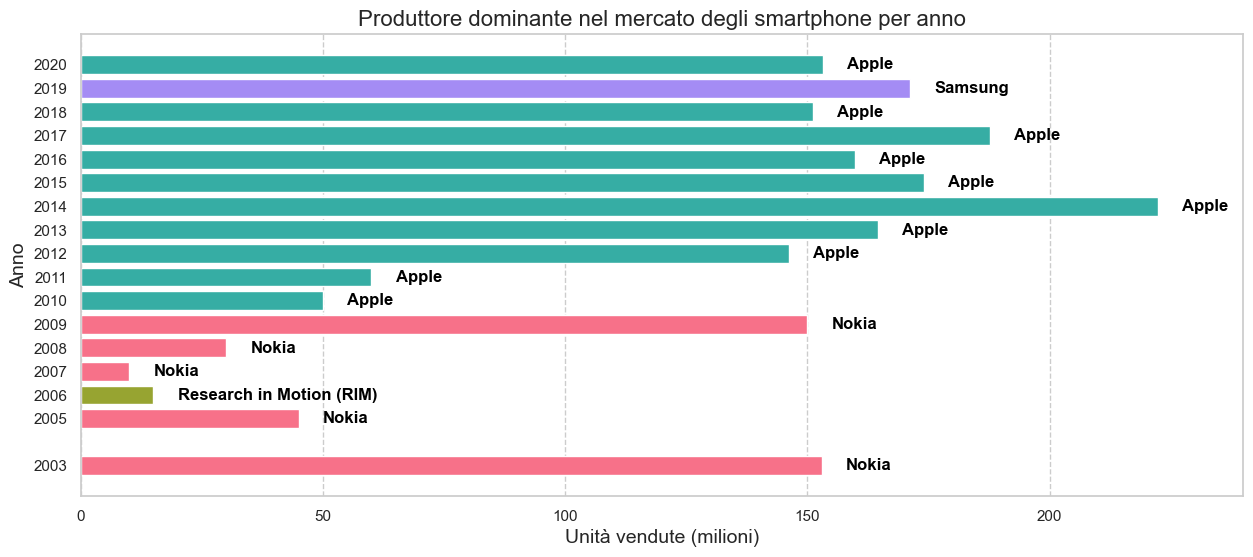

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#grafico per vendite anni degli smartphone
df = pd.read_csv("dataset1.csv")
df_smartphones = df[df["Smartphone?"] == True]#solo smartphone
df_grouped = df_smartphones.groupby(["Year", "Manufacturer"]).sum()["Units Sold (million )"].reset_index()
df_dominante = df_grouped.loc[df_grouped.groupby("Year")["Units Sold (million )"].idxmax()]
df_dominante = df_dominante[df_dominante["Year"] <= 2020] #consideriamo solo fino al 2020 (gli altri dati non sono completi)
sns.set_theme(style="whitegrid", palette="muted")
unique_manufacturers = df_dominante["Manufacturer"].unique()
palette = sns.color_palette("husl", len(unique_manufacturers))
color_map = {manufacturer: palette[i] for i, manufacturer in enumerate(unique_manufacturers)}
plt.figure(figsize=(15, 6))
bars = plt.barh(df_dominante["Year"], df_dominante["Units Sold (million )"],
                color=[color_map[manufacturer] for manufacturer in df_dominante["Manufacturer"]])
for i, txt in enumerate(df_dominante["Manufacturer"]):#per le etichette affianco
    plt.text(df_dominante["Units Sold (million )"].iloc[i] + 5, df_dominante["Year"].iloc[i], txt,
             va='center', fontsize=12, fontweight='bold', color='black')
plt.xlim(0, 240)
plt.yticks(df_dominante['Year'].unique()) 
plt.xlabel("Unità vendute (milioni)", fontsize=14)
plt.ylabel("Anno", fontsize=14)
plt.title("Produttore dominante nel mercato degli smartphone per anno", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=1)
plt.grid(axis='y', linestyle=' ', alpha=0)#per rimuovere linee orizzontali
plt.show()


# Qual è il telefono più venduto della storia?

## Analizziamo il telefono con più unità vendute
Ordinati i dati per unità vendute, si ricava il marchio con il numero più alto di vendite:

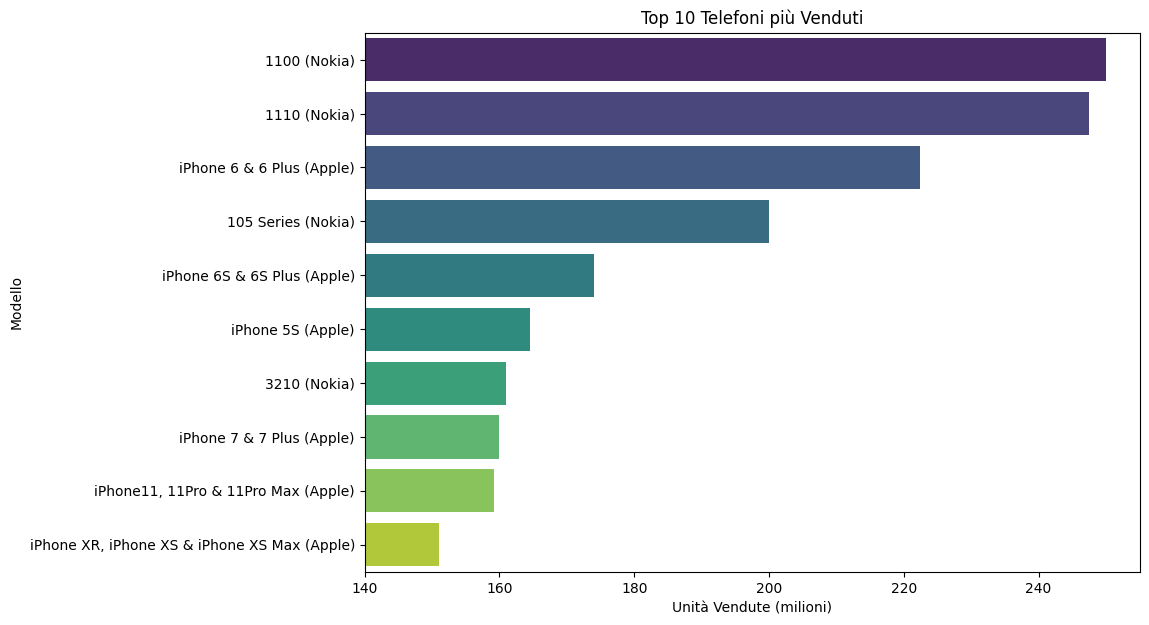

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#grafico telefono più venduto della storia
df1 = pd.read_csv("dataset1.csv")
df1['Model with Brand'] = df1['Model'] + " (" + df1['Manufacturer'] + ")"

#troviamo il telefono più venduto
most_sold_phone = df1.loc[df1["Units Sold (million )"].idxmax()]
phone_name = most_sold_phone["Model"]
brand = most_sold_phone["Manufacturer"]
year = most_sold_phone["Year"]
units_sold = most_sold_phone["Units Sold (million )"]

#grafico
plt.figure(figsize=(10, 7))
sns.barplot(y=df1["Model with Brand"][:10], x=df1["Units Sold (million )"][:10],hue=df1["Model with Brand"][:10], palette="viridis", legend=False)
plt.xlabel("Unità Vendute (milioni)")
plt.ylabel("Modello")
plt.title("Top 10 Telefoni più Venduti")
plt.xlim(140,255)
plt.show()

Il telefono più venduto è stato il **Nokia 1100 (2003)** con **250 milioni** di unità vendute.

## E per quanto riguarda gli smartphone?

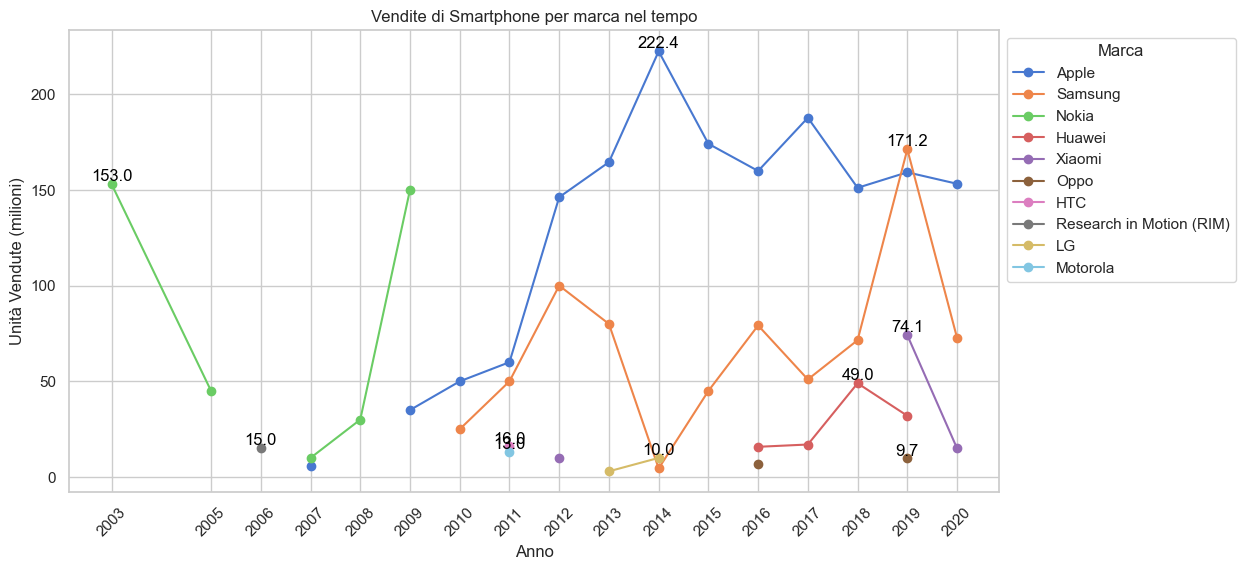

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

#grafico andamento vendite smartphone
df = pd.read_csv("dataset1.csv")
#prendiamo sono gli smartphone fino al 2020
df = df[df["Smartphone?"] == True]  
df = df[df["Year"] <= 2020]
df_grouped = df.groupby(["Year", "Manufacturer"])["Units Sold (million )"].sum().unstack()
top_manufacturers = df_grouped.sum(axis=0).nlargest(10).index #prendiamo solo le prime 10 marche più vendute
df_grouped = df_grouped[top_manufacturers]

#grafico
ax = df_grouped.plot(kind="line", marker="o", figsize=(12, 6))
for manufacturer in df_grouped.columns:
    max_value_idx = df_grouped[manufacturer].idxmax()
    max_value = df_grouped[manufacturer].max()
    ax.text(max_value_idx, max_value, f'{max_value:.1f}', color='black', ha='center', va='bottom')#per aggiungere valore sopra al punto massimo
plt.title("Vendite di Smartphone per marca nel tempo")
plt.xlabel("Anno")
plt.ylabel("Unità Vendute (milioni)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Marca")#legenda fuori dal grafico
plt.grid(True)
ax.set_xticks(df_grouped.index)#selezioniamo tutti gli anni del dataset
plt.xticks(rotation=45)#ruotare etichette asse x
plt.show()


## Andando più nel dettaglio...

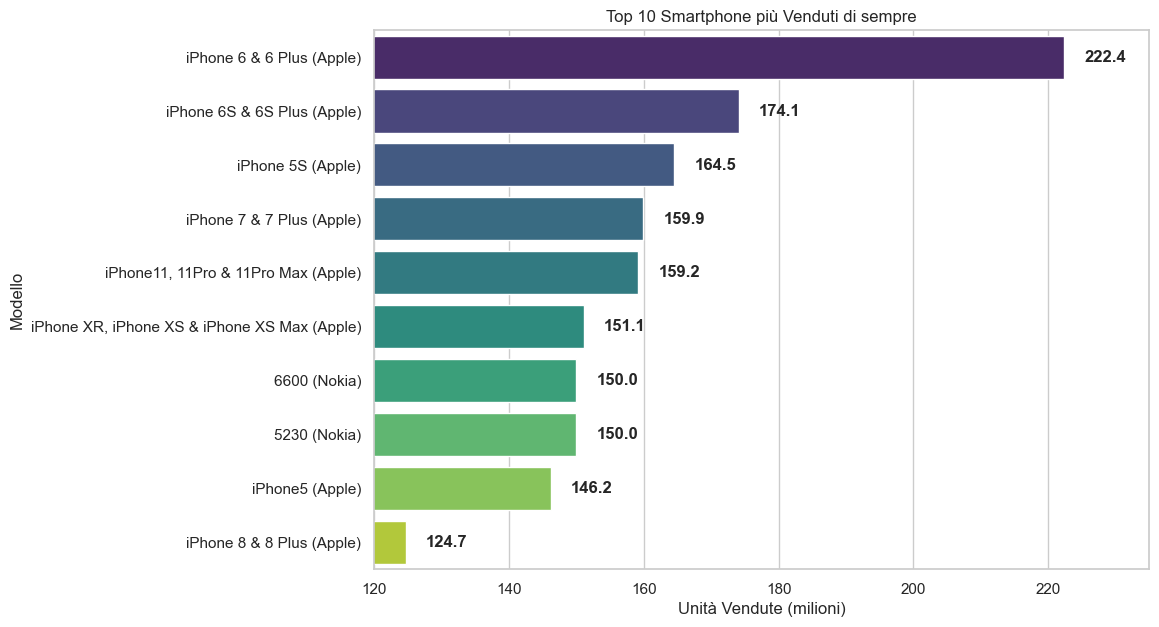

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#grafico smartphone più venduti
df1 = pd.read_csv("dataset1.csv")
df1['Model with Brand'] = df1['Model'] + " (" + df1['Manufacturer'] + ")"
df_smartphones = df1[df1["Smartphone?"] == True]
top_smartphones = df_smartphones.sort_values(by="Units Sold (million )", ascending=False).head(10)
plt.figure(figsize=(10, 7))
sns.barplot(y=top_smartphones["Model with Brand"], x=top_smartphones["Units Sold (million )"], 
            hue=top_smartphones["Model with Brand"], palette="viridis", legend=False)
plt.xlabel("Unità Vendute (milioni)")
plt.ylabel("Modello")
plt.title("Top 10 Smartphone più Venduti di sempre")
plt.xlim(120, 235) 
for i, value in enumerate(top_smartphones["Units Sold (million )"]): #valori affianco
    plt.text(value + 3, i, f'{value:.1f}', va='center', fontsize=12, fontweight='bold')
plt.show()


Lo smartphone più venduto di sempre è l'**iPhone6 & 6 Plus (Apple)** con **222.4 milioni** di vendite.

## E negli ultimi 5 anni?

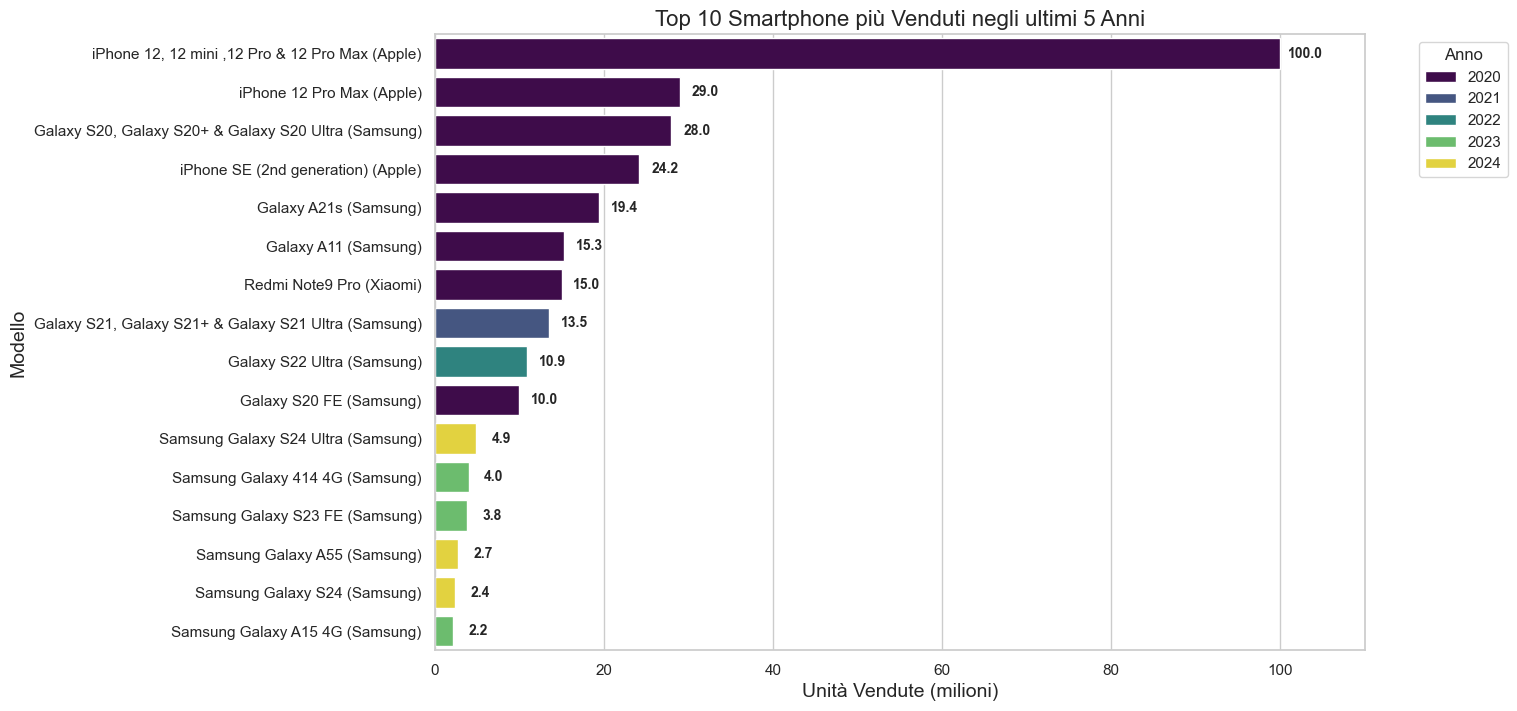

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#grafico smartphone ultimi 5 anni
df1 = pd.read_csv("dataset1.csv")
df1['Model with Brand'] = df1['Model'] + " (" + df1['Manufacturer'] + ")"
df_smartphones = df1[df1["Smartphone?"] == True]
latest_years = df_smartphones["Year"].sort_values(ascending=False).unique()[:5] #ultimi 5 anni disponibili
df_latest_years = df_smartphones[df_smartphones["Year"].isin(latest_years)]
top_smartphones_last_years = df_latest_years.sort_values(by="Units Sold (million )", ascending=False).groupby("Year").head(10)

#grafico
plt.figure(figsize=(12, 8))
sns.barplot(y=top_smartphones_last_years["Model with Brand"], x=top_smartphones_last_years["Units Sold (million )"], hue=top_smartphones_last_years["Year"], palette="viridis")
plt.xlabel("Unità Vendute (milioni)", fontsize=14)
plt.ylabel("Modello", fontsize=14)
plt.title(f"Top 10 Smartphone più Venduti negli ultimi {len(latest_years)} Anni", fontsize=16)
plt.xlim(0, top_smartphones_last_years["Units Sold (million )"].max() + 10)#limite asse x 
plt.legend(title="Anno", bbox_to_anchor=(1.05, 1), loc='upper left')
for i, value in enumerate(top_smartphones_last_years["Units Sold (million )"]):#valori affianco alle barre
    plt.text(value + 3, i, f'{value:.1f}', ha='center', va='center', fontsize=10, fontweight='bold')
plt.show()


# Matrice di correlazione
Calcoliamo la matrice di correlazione per analizzare le relazioni tra variabili come prezzo, valutazione, anno di uscita e vendite.

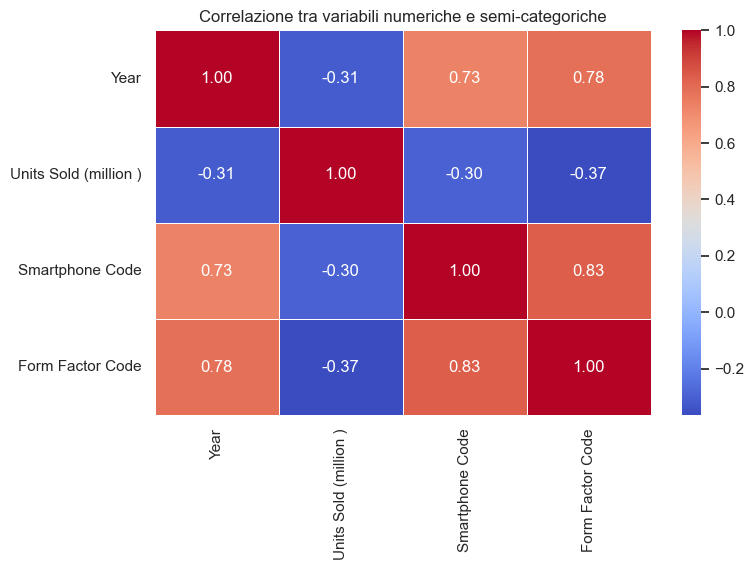

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#correlazione
df1 = pd.read_csv("dataset1.csv")
#convertiamo solo i valori sensati
df1['Form Factor Code'] = df1['Form Factor'].astype('category').cat.codes
df1['Smartphone Code'] = df1['Smartphone?'].astype(int) #True=1,False=0
df_numeric = df1[['Year', 'Units Sold (million )', 'Smartphone Code', 'Form Factor Code']]

correlation_matrix = df_numeric.corr()#matrice di correlazione
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)#per heatmap
plt.title('Correlazione tra variabili numeriche e semi-categoriche')
plt.show()


- Correlazione lievemente negativa tra **Anno e Unità Vendute**;
- Correlazione fortemente positiva tra **Anno e Smartphone**;
- Correlazione debolmente negativa tra **Smartphone e Unità Vendute**;
- Correlazione moderatamente negativa tra **Form Factor e Unità Vendute** .

# **Conclusioni**
## Cosa abbiamo scoperto?
1.  Le **unità vendute diminuiscono** con il passare degli anni;
2. Il telefono più venduto di sempre è **Nokia 1100 (2003)** con 250 milioni di unità, ma Apple ha gli smartphone più venduti di sempre. L’**iPhone 6 & 6 Plus (2014)** è lo smartphone più venduto con 222,4 milioni di unità;
3. Marche come **Apple e Samsung** hanno una forte correlazione con le vendite;
4. I non-smartphone sono stati sostituiti dagli **smartphone**;
5. Le **marche più recenti** dominano il mercato degli smartphone.


# Grazie per l'attenzione